# Natural Language Processing






In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset=pd.read_csv("Restaurant_Reviews.tsv",delimiter="\t",quoting=3)

In [3]:
import re
import nltk
#nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [4]:
corpus=[]

In [5]:
dataset.iloc[0,0]

'Wow... Loved this place.'

In [7]:
for i in range(0,1000):
    # Only Taking the A-Z and a-z and removing symbol
    rev=re.sub("[^a-zA-Z]"," ",dataset["Review"][i])
    
    # Converting to lowercase
    rev=rev.lower()
    
    # wow loved this place ==> [ "wow", "loved" , "this" , "place" ]
    rev=rev.split()
    
    # removing Stopwords ==> if, this.... etc
    rev=[word for word in rev if not word in stopwords.words("english")]
    
    # loved ==> love
    rev=[ps.stem(word) for word in rev if not word in set(stopwords.words("english"))]
    
    # [ "wow", "love" , "place" ] ==> wow loved this place
    rev=" ".join(rev)
    
    # appending with list
    corpus.append(rev)   

In [8]:
from sklearn.feature_extraction.text import CountVectorizer

cv=CountVectorizer(max_features=1400)

x=cv.fit_transform(corpus).toarray()
y=pd.DataFrame(dataset["Liked"])

In [9]:
from sklearn.naive_bayes import GaussianNB

nb=GaussianNB()

nb.fit(x,y)

/home/anonymous/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

In [10]:
y_pred=nb.predict(x)

In [11]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y,y_pred)

cm

array([[403,  97],
       [  0, 500]])

# sentiment analysis


In [12]:
from textblob import TextBlob

In [15]:
analysis = TextBlob("I am whatever")
if analysis.sentiment.polarity > 0:
    print("positive")
elif analysis.sentiment.polarity == 0:
    print("Neutral")
else:
    print("negative")

Neutral


In [16]:
dataset=pd.read_csv("Restaurant_Reviews.tsv",delimiter="\t",quoting=3)

In [17]:
dataset.head(2)

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0


In [19]:
x=pd.DataFrame(dataset["Review"])
y=pd.DataFrame(dataset["Liked"])

In [20]:
l=len(x)

In [21]:
li=[]
for i in range(0,l,1):
    analysis = TextBlob(x.iloc[i,0])
    if analysis.sentiment.polarity > 0:
        li.append(1)
    elif analysis.sentiment.polarity == 0:
        li.append(2)
    else:
        li.append(0)

In [22]:
#converting to DF
y_pred=pd.DataFrame(li)

In [23]:
from sklearn.metrics import confusion_matrix

In [24]:
cm=confusion_matrix(y["Liked"],y_pred)

In [25]:
cm

array([[222, 120, 158],
       [ 28, 394,  78],
       [  0,   0,   0]])

In [26]:
x["liked"]=y_pred

In [27]:
x.head()

,Review,liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [28]:
pos,neg,neu=y_pred[0].value_counts()

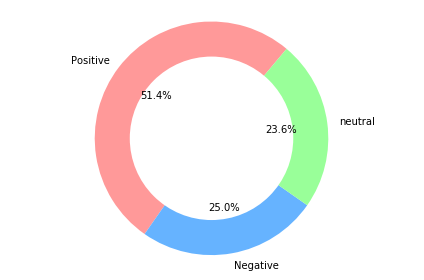

In [29]:
#donut chart
labels = ["Positive","Negative","neutral"]
sizes = [pos,neg,neu]
colors = ['#ff9999','#66b3ff','#99ff99']
 
fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=50)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax1.axis('equal')  
plt.tight_layout()
plt.show()